# 简化数据：主成分分析（Principal Component Analysis，PCA）

### 1 概述

在主成分分析中，数据从原来的坐标系转换到了新的坐标系，新坐标系的选择是由数据本身决定的。第一个新坐标轴选择的是原始数据中方差最大的方向，第二个新坐标轴的选择和第一个坐标轴正交且具有最大方差的方向。该过程一直重复，重复次数为原始数据中特征的数目。我们会发现，大部分方差都包含在最前面的几个新坐标轴中。因此，我们可以忽略余下的坐标轴，即对数据进行了降维处理。

* 优点：降低数据的复杂性，识别最重要的多个特征。
* 缺点：不一定需要，且可能损失有用信息。
* 适用数据类型：数值型数据。

### 2 实现

将数据转换成前N个主成分的伪码大致如下：

```
去除平均值
计算协方差矩阵
计算协方差矩阵的特征值和特征向量
将特征值从大到小排序
保留最上面的N个特征向量
将数据转换到上述N个特征向量构建的新空间中
```

In [4]:
from numpy import *

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [5]:
dataMat = loadDataSet('../data/pcaTestSet.txt')
lowDMat, reconMat = pca(dataMat, 1)
shape(lowDMat)

(1000, 1)

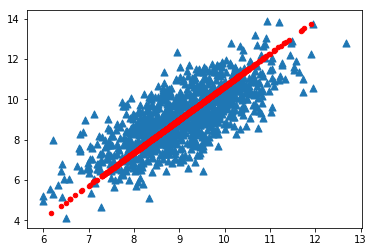

In [19]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=50)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=20, c='red')